# Exercise: Pipeline

In this exercise, we aim to train a pipeline along with parameter tuning and perform prediction with the best model. More specifically we accomplish the following tasks: 

1. Develop a pipeline with feature extraction and linear regression models  
2. Perform grid search with the pipeline for optimizing some hyper-parameters
3. Evaluate the best model's performance
4. Identify the second best model 


The dataset we will be using for the dataset is face dataset.

## Face Data

(from SciKit Learn Docs)

This dataset is a collection of JPEG pictures of famous people collected over the internet, 
all details are available on the official website:

  *  http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. 
The typical task is called Face Verification: 
given a pair of two pictures, 
a binary classifier must predict whether the two images are from the same person.

An alternative task, 
Face Recognition or Face Identification is: 
given the picture of the face of an unknown person, 
identify the name of the person by referring to a gallery of previously seen pictures of identified persons.

Both Face Verification and Face Recognition are tasks that are typically 
performed on the output of a model trained to perform Face Detection. 
The most popular model for Face Detection is called Viola-Jones and is 
implemented in the OpenCV library. 
The LFW faces were extracted by this face detector from various online websites.

---

# Import libs

In [26]:
# Import all the libs you need:

from time import time
import matplotlib.pyplot as plt
import pandas as pd

## Load necessary libraries
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from pandas import option_context


# Load the Dataset
Load the dataset from sklearn datasets using `fetch_lfw_people`. Print the number of samples, features, and  classes.

In [2]:
# load the dataset:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


# Visualize Some Sample Images
Randomly sample 9 images from the dataset and visualize them in a 3X3 grid with their labels. 

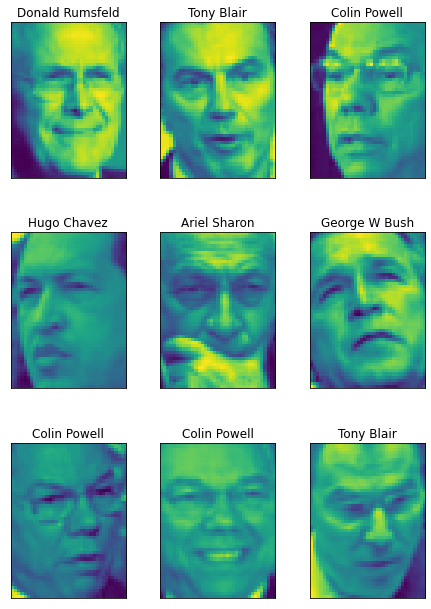

In [5]:
# visualize using matplot lib

from matplotlib import pyplot
import numpy as np

row = 3
col = 3
total_sample = len(lfw_people.data)

pyplot.subplots_adjust(bottom=0, left=.01, right=.99, top=2, hspace=.35)


for i in range(row*col):
    pyplot.subplot(row, col, i+1)
    random_index = np.random.randint(0, total_sample)
    single_label = np.copy(lfw_people.data[random_index, :])
    single_label = single_label.reshape((h,w))
    pyplot.title(target_names[lfw_people.target[random_index]], size=12)
    pyplot.xticks(())
    pyplot.yticks(())
    pyplot.imshow(single_label)

# Split the dataset
Split the dataset into train (75%) and test (25%).

In [3]:
# split the dataset (E001)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 42)


# Build a Pipeline

Now we build a pipeline that performs feature extraction with PCA followed by classification using logistic regression. While developing the pipeline, we perform the following tasks. 

1. For PCA vary the `n_components` parameter and for logistic regression vary the regularization parameter `C`. Use at least 5 different values for each of these parameters. 
2. Use 10-fold cross validation while using the gridsearch


Note: If LogisticRegression doesn't converge increase the value for `max_iter`. 

## Define the pipeline


In [4]:
# Define the pipeline (E002)
pipe = Pipeline(steps = [
    ('PCA', PCA()), 
    ('Logistic', LogisticRegression())
])


## Configure the Parameters for Grid Search

In [9]:
# Configure the parameters for grid search (E003)
param_grid = {'PCA__n_components': [5, 20, 30, 35, 60], 
              'Logistic__C': [0.001, 0.1, 1.0, 10, 100], 
              'Logistic__max_iter': [5000]
              }


## Train the Pipeline with Grid Search

In [10]:
# Train the Pipeline with Grid Search (E004)
model_grid = GridSearchCV(pipe, param_grid, n_jobs = 2, cv = 10)

model_grid.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('PCA', PCA()),
                                       ('Logistic', LogisticRegression())]),
             n_jobs=2,
             param_grid={'Logistic__C': [0.001, 0.1, 1.0, 10, 100],
                         'Logistic__max_iter': [5000],
                         'PCA__n_components': [5, 20, 30, 35, 60]})

Once the pipline is fitted, we can address the following tasks. 

## Show the parameters of the trained models and their rankings within this pipeline

In [27]:
# Show the parameters of the trained models and their rankings in a table (E005)
pd.set_option("max_colwidth", 80)

modelgrid_df = pd.DataFrame(model_grid.cv_results_)
modelgrid_df[['params','rank_test_score']]


,params,rank_test_score
0,"{'Logistic__C': 0.001, 'Logistic__max_iter': 5000, 'PCA__n_components': 5}",21
1,"{'Logistic__C': 0.001, 'Logistic__max_iter': 5000, 'PCA__n_components': 20}",16
2,"{'Logistic__C': 0.001, 'Logistic__max_iter': 5000, 'PCA__n_components': 30}",12
3,"{'Logistic__C': 0.001, 'Logistic__max_iter': 5000, 'PCA__n_components': 35}",2
4,"{'Logistic__C': 0.001, 'Logistic__max_iter': 5000, 'PCA__n_components': 60}",1
5,"{'Logistic__C': 0.1, 'Logistic__max_iter': 5000, 'PCA__n_components': 5}",21
6,"{'Logistic__C': 0.1, 'Logistic__max_iter': 5000, 'PCA__n_components': 20}",17
7,"{'Logistic__C': 0.1, 'Logistic__max_iter': 5000, 'PCA__n_components': 30}",10
8,"{'Logistic__C': 0.1, 'Logistic__max_iter': 5000, 'PCA__n_components': 35}",5
9,"{'Logistic__C': 0.1, 'Logistic__max_iter': 5000, 'PCA__n_components': 60}",8


## Show the parameters of the best model

In [21]:
# Show the best model's parameters (E006)
best_params = model_grid.best_params_
print(best_params)


{'Logistic__C': 0.001, 'Logistic__max_iter': 5000, 'PCA__n_components': 60}


## Show the parameters of the second best model

In [30]:
# Show the parameters of the second best model (E007)
score_filter = modelgrid_df[modelgrid_df['rank_test_score'] == 2]
score_filter.iloc[:, [7,20]]


,params,rank_test_score
3,"{'Logistic__C': 0.001, 'Logistic__max_iter': 5000, 'PCA__n_components': 35}",2


## Show the mean and stddev of the test scores (i.e CV scores) for the second best model

In [34]:
# Show the mean and stddev of the test scores (i.e CV scores) for the second best model (E008)
score_filter.iloc[:, 18:]


,mean_test_score,std_test_score,rank_test_score
3,0.741151,0.052733,2


## Evaluate the best model using the test data

Perform the following tasks: 

1. Make prediction
1. Show confusion matrix
1. Show classification task

In [35]:
# Make prediction (E009)
predicted_y = model_grid.predict(X_test)


In [36]:
# Show confusion matrix (E010)
pd.DataFrame(confusion_matrix(y_test, predicted_y))


,0,1,2,3,4,5,6
0,8,2,2,1,0,0,0
1,1,50,3,4,0,0,2
2,5,2,15,5,0,0,0
3,4,5,4,122,2,2,7
4,1,0,0,1,21,1,1
5,1,1,0,1,1,10,1
6,2,1,2,4,4,0,23


In [37]:
# Show the classification report (E011)
print(classification_report(y_test, predicted_y))


              precision    recall  f1-score   support

           0       0.36      0.62      0.46        13
           1       0.82      0.83      0.83        60
           2       0.58      0.56      0.57        27
           3       0.88      0.84      0.86       146
           4       0.75      0.84      0.79        25
           5       0.77      0.67      0.71        15
           6       0.68      0.64      0.66        36

    accuracy                           0.77       322
   macro avg       0.69      0.71      0.70       322
weighted avg       0.79      0.77      0.78       322



# Save your Notebook, then `File > Close and Halt`